In [6]:
import pandas as pd 
import numpy as np
import os.path
import matplotlib.pyplot as plt
import seaborn as sns
import glob

%matplotlib inline
sns.set_style("white")

base_dir = os.path.dirname(os.getcwd())

plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams["font.family"] = "sans-serif"
sns.set_style(style='ticks')

# Study 1

Participant's own behavior + perceptions of their own connection

## Figure 1A

Distribution of gap lengths for stranger and friend conversations

/Users/emma/anaconda3/envs/python3_8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


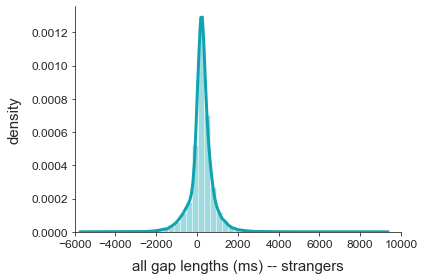

In [7]:
flist = glob.glob(os.path.join(base_dir, 'Analyses', 'turn_taking', 'strangers', '*.csv'))
data = pd.read_csv(flist[0])
all_latency_values_strangers = data['gap_length']

for file in flist[1:]:
    
    data = pd.read_csv(file)
    all_latency_values_strangers = all_latency_values_strangers.append(data['gap_length'])
    
ax = sns.distplot(all_latency_values_strangers, hist = True, kde = True,
             kde_kws = {'linewidth': 3}, color='#0FA3B1')
plt.xlim(-6000, 10000)

ax.set_xlabel('all gap lengths (ms) -- strangers', fontsize=15, labelpad=10)
ax.set_ylabel('density', fontsize=15, labelpad=10)
ax.tick_params(labelsize=12)

sns.despine()
plt.tight_layout()

plt.savefig(os.path.join(base_dir,'Figures','Fig1A_strangers.pdf'), dpi=300)

/Users/emma/anaconda3/envs/python3_8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


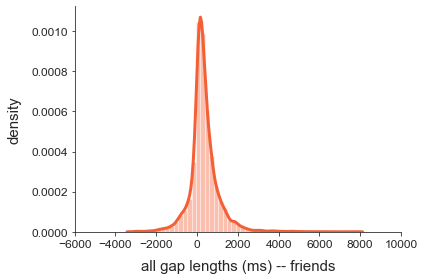

In [8]:
flist = glob.glob(os.path.join(base_dir, 'Analyses', 'turn_taking', 'friends', '*.csv'))
data = pd.read_csv(flist[0])
all_latency_values_friends = data['gap_length']

for file in flist[1:]:
    
    data = pd.read_csv(file)
    all_latency_values_friends = all_latency_values_friends.append(data['gap_length'])
    
ax = sns.distplot(all_latency_values_friends, hist = True, kde = True,
             kde_kws = {'linewidth': 3}, color='#F46036')
plt.xlim(-6000, 10000)

ax.set_xlabel('all gap lengths (ms) -- friends', fontsize=15, labelpad=10)
ax.set_ylabel('density', fontsize=15, labelpad=10)
ax.tick_params(labelsize=12)

sns.despine()
plt.tight_layout()

plt.savefig(os.path.join(base_dir,'Figures','Fig1A_friends.pdf'), dpi=300)


## Figure 1B

Distribution of gap lengths for stranger and friend conversations, zooming in on "long" gap part of the distribution

/Users/emma/anaconda3/envs/python3_8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/emma/anaconda3/envs/python3_8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


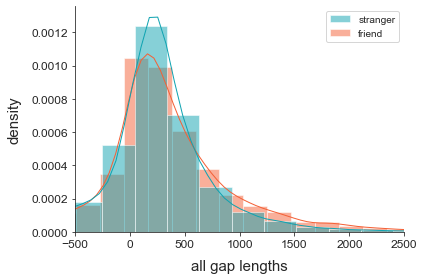

In [9]:
ax = sns.distplot(all_latency_values_friends, hist = True, kde = True,
             kde_kws = {'linewidth': 1}, color='#F46036', label = 'friend', hist_kws=dict(alpha=0.5))
ax = sns.distplot(all_latency_values_strangers, hist = True, kde = True,
             kde_kws = {'linewidth': 1}, color='#0FA3B1', label = 'stranger', hist_kws=dict(alpha=0.5))

plt.xlim(-500, 2500)

ax.set_xlabel('all gap lengths', fontsize=15, labelpad=10)
ax.set_ylabel('density', fontsize=15, labelpad=10)
ax.tick_params(labelsize=12)

handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])

sns.despine()
plt.tight_layout()

plt.savefig(os.path.join(base_dir,'Figures','Fig1B.pdf'), dpi=300)


# Figure 1C

Difference in **median** gap lengths for stranger conversations compared to friend conversations.

In [9]:
stranger_data = pd.read_csv(os.path.join(base_dir, 'Analyses', 'turn_taking_strangers.csv'))
friend_data = pd.read_csv(os.path.join(base_dir, 'Analyses', 'turn_taking_friends.csv'))

stranger_data['condition'] = 'stranger'
friend_data['condition'] = 'friend'

data = pd.merge(stranger_data, friend_data, how='outer')

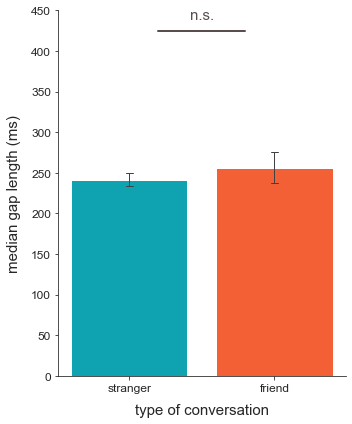

In [10]:
plt.figure(figsize=(5,6))

ax = sns.barplot(x="condition", y="median_gap_convo", data=data, errwidth=1,
                 capsize=.05, 
                 palette=['#0FA3B1', '#F46036'],
                saturation=1)

ax.set_xlabel('type of conversation', fontsize=15, labelpad=10)
ax.set_ylabel('median gap length (ms)', fontsize=15, labelpad=10)
ax.tick_params(labelsize=12)
ax.set(ylim=(0, 450))

sns.despine()
plt.tight_layout()

# significance bar
lw = 2
line_color = '#594F4F' # create thinner, greyer lines
star_color = '#594F4F'
h = 0
space_between_stars_and_line = 10
star_font_size = 15

# strangers vs friends
x1, x2 = .20, .80   
y = 425
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=lw, c=line_color)
plt.text((x1+x2)*.5, y+space_between_stars_and_line, "n.s.", ha='center', va='bottom', color=star_color, fontsize=star_font_size)

plt.savefig(os.path.join(base_dir,'Figures','Fig1C.pdf'), dpi=300)


# Figure 1D

Difference in **mean** gap lengths for stranger conversations compared to friend conversations.

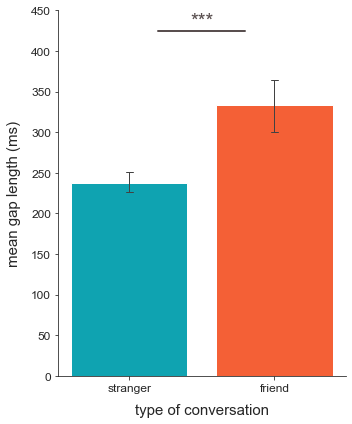

In [11]:
plt.figure(figsize=(5,6))

ax = sns.barplot(x="condition", y="mean_gap_convo", data=data, errwidth=1,
                 capsize=.05, 
                 palette=['#0FA3B1', '#F46036'],
                saturation=1)

ax.set_xlabel('type of conversation', fontsize=15, labelpad=10)
ax.set_ylabel('mean gap length (ms)', fontsize=15, labelpad=10)
ax.tick_params(labelsize=12)
ax.set(ylim=(0, 450))

sns.despine()
plt.tight_layout()

# significance bar
lw = 2
line_color = '#594F4F' # create thinner, greyer lines
star_color = '#594F4F'
h = 0
space_between_stars_and_line = -.4
star_font_size = 20

# strangers vs friends
x1, x2 = .20, .80   
y = 425
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=lw, c=line_color)
plt.text((x1+x2)*.5, y+space_between_stars_and_line, "***", ha='center', va='bottom', color=star_color, fontsize=star_font_size)

plt.savefig(os.path.join(base_dir,'Figures','Fig1D.pdf'), dpi=300)


# Figure 2A

Differences in average reported connection for friend vs stranger conversations

In [12]:
data_strangers = pd.read_csv(os.path.join(base_dir,'Analyses','connection_strangers.csv'))
data_friends = pd.read_csv(os.path.join(base_dir,'Analyses','connection_friends.csv'))

data_strangers['dataset'] = 'strangers'
data_friends['dataset'] = 'friends'

data = pd.merge(data_strangers, data_friends, how='outer')

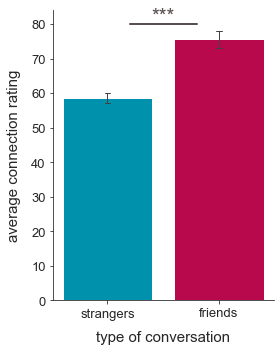

In [14]:
plt.figure(figsize=(4,5))

friend_color = '#b7094c'
stranger_color = '#0091ad'

ax = sns.barplot(x="dataset", y="avg_connection", data=data, 
                 palette=[stranger_color, friend_color],
                saturation=1, errwidth=1,
                 capsize=.05)

ax.set_xlabel('type of conversation', fontsize=15, labelpad=10)
ax.set_ylabel('average connection rating', fontsize=15, labelpad=10)
ax.tick_params(labelsize=13)

# significance bar
lw = 2
line_color = '#594F4F' # create thinner, greyer lines
star_color = '#594F4F'
h = 0
space_between_stars_and_line = -.4
star_font_size = 20

# strangers vs friends
x1, x2 = .20, .80   
y = 80
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=lw, c=line_color)
plt.text((x1+x2)*.5, y+space_between_stars_and_line, "***", ha='center', va='bottom', color=star_color, fontsize=star_font_size)


sns.despine()
plt.tight_layout()

plt.savefig(os.path.join(base_dir,'Figures','Fig2A.pdf'), dpi=300)


# Figure 2B

Explore average changes in connection ratings before and after a long gap, separately for friend and stranger conversations.

In [4]:
long_gaps_all = pd.read_csv(os.path.join(base_dir, 'Analyses', 'long_gap_connection_all_long_format.csv'))

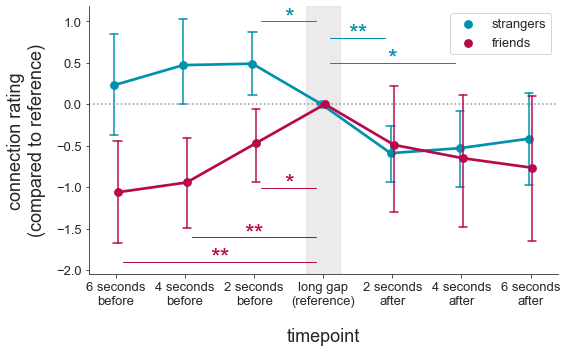

In [5]:
plt.figure(figsize=(8,5))

plt.axhline(y=0, color='#87919E', linestyle='dotted')

timepoint_labels = ['6 seconds\nbefore', '4 seconds\nbefore', '2 seconds\nbefore', 'long gap\n(reference)',
                   '2 seconds\nafter', '4 seconds\nafter', '6 seconds\nafter']

friend_color = '#b7094c'
stranger_color = '#0091ad'

ax = sns.pointplot(x="timepoint", y="connection_change", hue="condition",
                   data=long_gaps_all, dodge=True,
                  order=["3_before", "2_before", "1_before", 'long_gap', '1_after', '2_after', '3_after'],
                  palette = [stranger_color,friend_color], capsize=0.12, markers='o', errwidth=1.5)

plt.xlabel("timepoint", fontsize=18, labelpad=20)
plt.ylabel("connection rating\n(compared to reference)", fontsize=18, labelpad=10)

ax.tick_params(labelsize=13)
plt.legend(fontsize='13')

ax.set_xticklabels(timepoint_labels)

ax.axvspan(2.75, 3.25, alpha=0.3, color='silver')

## significance for friends
lw = 1
line_color = friend_color 
star_color = friend_color
h = 0
space_between_stars_and_line = -.1
star_font_size = 25

# long gap vs 3 before
x1, x2 = 0.1, 2.9   
y = -1.9
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=lw, c=line_color)
plt.text((x1+x2)*.5, y+space_between_stars_and_line, "**", ha='center', va='bottom', color=star_color, fontsize=star_font_size)

# long gap vs 2 before
x1, x2 = 1.1, 2.9   
y = -1.6
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=lw, c=line_color)
plt.text((x1+x2)*.5, y+space_between_stars_and_line, "**", ha='center', va='bottom', color=star_color, fontsize=star_font_size)

# long gap vs 1 before
x1, x2 = 2.1, 2.9   
y = -1.005
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=lw, c=line_color)
plt.text((x1+x2)*.5, y+space_between_stars_and_line, "*", ha='center', va='bottom', color=star_color, fontsize=star_font_size)

## significance for strangers
lw = 1
line_color = stranger_color 
star_color = stranger_color
h = 0
space_between_stars_and_line = -.1
star_font_size = 25

# long gap vs 1 before
x1, x2 = 2.1, 2.9   
y = 1.0
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=lw, c=line_color)
plt.text((x1+x2)*.5, y+space_between_stars_and_line, "*", ha='center', va='bottom', color=star_color, fontsize=star_font_size)
         
# long gap vs 1 after
x1, x2 = 3.1, 3.9   
y = 0.8
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=lw, c=line_color)
plt.text((x1+x2)*.5, y+space_between_stars_and_line, "**", ha='center', va='bottom', color=star_color, fontsize=star_font_size)

# long gap vs 2 after
x1, x2 = 3.1, 4.9   
y = 0.5
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=lw, c=line_color)
plt.text((x1+x2)*.5, y+space_between_stars_and_line, "*", ha='center', va='bottom', color=star_color, fontsize=star_font_size)


sns.despine()
plt.tight_layout()

plt.savefig(os.path.join(base_dir,'Figures','Fig2B.pdf'), dpi=300)


# Study 2

Independent raters' perceptions of long gaps in conversation

In [17]:
rating_data = pd.read_csv(os.path.join(base_dir, 'Analyses', 'long_gap_ratings_wide_format.csv'))
rating_data['video_num'] = rating_data['video_num'].astype(int)
data_info = pd.read_csv(os.path.join(base_dir, 'Data', 'long_gap_stimuli_info.csv'))

data_full = pd.merge(data_info, rating_data, how='inner', on=['video_num'])

## Figure 3A

Differences in perceived awkwardness in friend vs stranger conversations

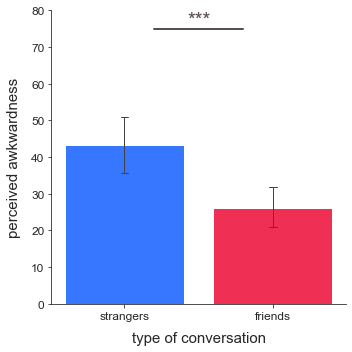

In [18]:
plt.figure(figsize=(5,5))

ax = sns.barplot(x="condition", y="awkward_mean", data=data_full, errwidth=1,
                 capsize=.05, 
                 palette=['#3777FF', '#EF3054'],
                saturation=1)

ax.set_xlabel('type of conversation', fontsize=15, labelpad=10)
ax.set_ylabel('perceived awkwardness', fontsize=15, labelpad=10)
ax.tick_params(labelsize=12)
ax.set(ylim=(0, 80))

sns.despine()
plt.tight_layout()

# significance bar
lw = 2
line_color = '#594F4F' # create thinner, greyer lines
star_color = '#594F4F'
h = 0
space_between_stars_and_line = -.4
star_font_size = 20

# strangers vs friends
x1, x2 = .20, .80   
y = 75
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=lw, c=line_color)
plt.text((x1+x2)*.5, y+space_between_stars_and_line, "***", ha='center', va='bottom', color=star_color, fontsize=star_font_size)

plt.savefig(os.path.join(base_dir, 'Figures', 'Fig3A.pdf'), dpi=300)


## Figure 3B

Differences in perceived connection in friend vs stranger conversations

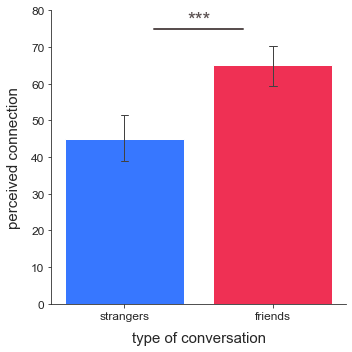

In [19]:
plt.figure(figsize=(5,5))

ax = sns.barplot(x="condition", y="connected_mean", data=data_full, errwidth=1,
                 capsize=.05, 
                 palette=['#3777FF', '#EF3054'],
                saturation=1)

ax.set_xlabel('type of conversation', fontsize=15, labelpad=10)
ax.set_ylabel('perceived connection', fontsize=15, labelpad=10)
ax.tick_params(labelsize=12)
ax.set(ylim=(0, 80))

sns.despine()
plt.tight_layout()

# significance bar
lw = 2
line_color = '#594F4F' # create thinner, greyer lines
star_color = '#594F4F'
h = 0
space_between_stars_and_line = -.4
star_font_size = 20

# strangers vs friends
x1, x2 = .20, .80   
y = 75
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=lw, c=line_color)
plt.text((x1+x2)*.5, y+space_between_stars_and_line, "***", ha='center', va='bottom', color=star_color, fontsize=star_font_size)

plt.savefig(os.path.join(base_dir, 'Figures', 'Fig3B.pdf'), dpi=300)


## Figure 3C

Differences in percieved awkwardness in friend vs stranger conversations, as a function of gap length

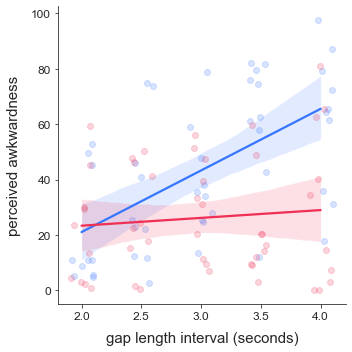

In [20]:
sns.lmplot(x="interval", y="awkward_mean", hue="condition", data=data_full,
          palette=['#3777FF', '#EF3054'], x_jitter=.1, y_jitter=None,
          scatter_kws={'alpha':0.2}, legend=False)

plt.xlabel("gap length interval (seconds)", fontsize=15, labelpad=10)
plt.ylabel("perceived awkwardness", fontsize=15, labelpad=10)
plt.tick_params(labelsize=12)

sns.despine()
plt.tight_layout()

plt.savefig(os.path.join(base_dir, 'Figures', 'Fig3C.pdf'), dpi=300)


## Figure 3D

Differences in percieved connection in friend vs stranger conversations, as a function of gap length

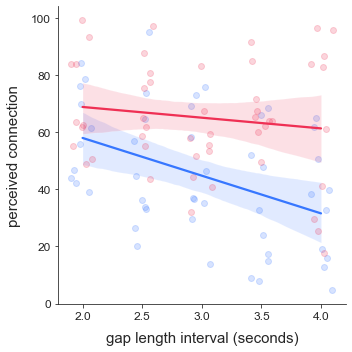

In [21]:
sns.lmplot(x="interval", y="connected_mean", hue="condition", data=data_full,
          palette=['#3777FF', '#EF3054'], x_jitter=.1, y_jitter=None,
          scatter_kws={'alpha':0.2}, legend=False)

plt.xlabel("gap length interval (seconds)", fontsize=15, labelpad=10)
plt.ylabel("perceived connection", fontsize=15, labelpad=10)
plt.tick_params(labelsize=12)

sns.despine()
plt.tight_layout()

plt.savefig(os.path.join(base_dir, 'Figures', 'Fig3D.pdf'), dpi=300)
